In [41]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

In [42]:
url = "https://berggasse19.org/wp-content/uploads/2015/05/stravinsky_picasso_wikipedia.png"
strav = skimage.io.imread(url) / 255

In [43]:
cols, rows = np.meshgrid(np.linspace(-100, 100, strav.shape[1]), np.linspace(-100, 100, strav.shape[0]))
noise = np.sin(2 * np.pi * 0.02 * (cols * np.cos(np.pi / 6) + rows * np.sin(np.pi / 6)))
noise = (noise - np.min(noise)) / (np.max(noise) - np.min(noise))
strav_with_noise = strav + noise
strav_with_noise = (strav_with_noise - np.min(strav_with_noise)) / (np.max(strav_with_noise) - np.min(strav_with_noise))

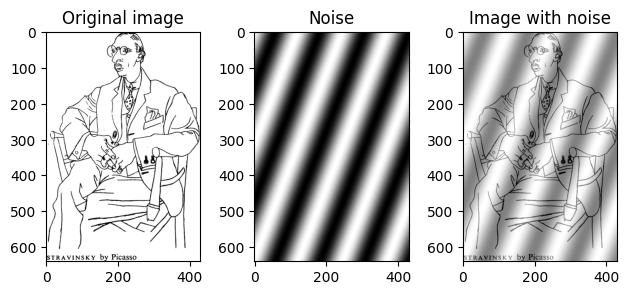

In [44]:
fig, axs = plt.subplots(1, 3)
axs[0].set_title("Original image")
axs[0].imshow(strav, cmap="gray")
axs[1].set_title("Noise")
axs[1].imshow(noise, cmap="gray")
axs[2].set_title("Image with noise")
axs[2].imshow(strav_with_noise, cmap="gray")
fig.tight_layout()
plt.show()

In [45]:
u, sigma, vt = np.linalg.svd(strav_with_noise)

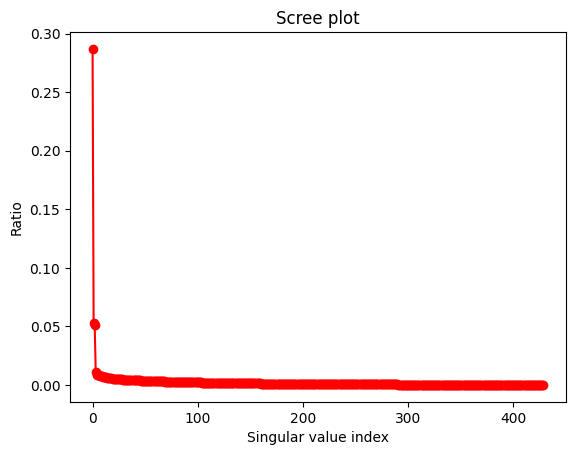

In [46]:
# Scree plot.
fig, ax = plt.subplots()
ax.set_title("Scree plot")
ax.set_xlabel("Singular value index")
ax.set_ylabel("Ratio")
ax.plot(range(len(sigma)), sigma / np.sum(sigma), "ro-")
plt.show()

In [47]:
layers = [np.zeros_like(strav_with_noise)]
for i in range(4):
    layers.append(sigma[i] * np.outer(u[:, i], vt[i, :]))

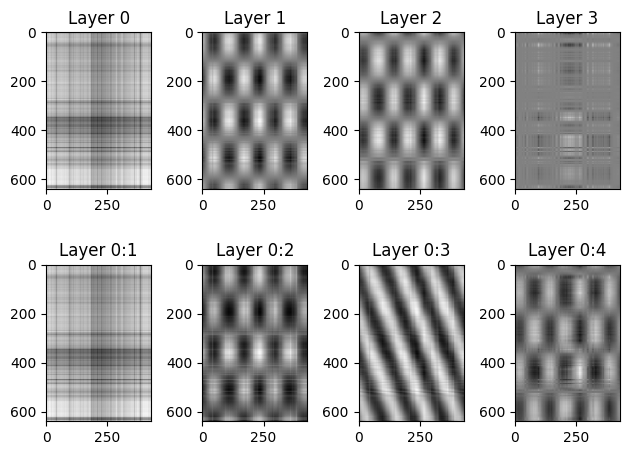

In [48]:
fig, axes = plt.subplots(2, 4)
for i in range(4):
    axes[0, i].set_title(f"Layer {i}")
    axes[0, i].imshow(layers[i + 1], cmap="gray")
    axes[1, i].set_title(f"Layer 0:{i + 1}")
    axes[1, i].imshow(layers[i + 1] - layers[i], cmap="gray")
fig.tight_layout()
plt.show()